# Advanced fMRI data analysis 
## General Linear Model 1


In this assignment, your task is to complete a few linear regression excercises in Python.

You can choose to answer in Polish or English (it will not affect your grade).

**DEADLINE:** 08-05-2020

-------------------

## Linear regression analysis with signals of non-neuronal origin

*Confounds* (or nuisance regressors) are variables representing fluctuations with a potential non-neuronal origin. Such non-neuronal fluctuations may drive spurious results in fMRI data analysis, including standard activation GLM and functional connectivity analyses. Read [more](https://fmriprep.readthedocs.io/en/stable/outputs.html#confounds).

Run simple and multiple linear regression to investigate associations between regressors.

Confounds regressors calculated with *fMRIPrep* are stored in data folder (`/data/sub-01_task-rhymejudgment_desc-confounds_regressors.tsv`)

### Task 1

Investigate linear relationship between *global signal* (signal from the whole brain) and signal from *white matter*.

In [1]:
# Load libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
# Load DataFrame with confounds

conf_path = "data/sub-01_task-rhymejudgment_desc-confounds_regressors.tsv"
conf = pd.read_csv(conf_path, delimiter="\t")

# Print all column names (use df.columns.values)

print(conf.columns.values)


['csf' 'csf_derivative1' 'csf_power2' 'csf_derivative1_power2'
 'white_matter' 'white_matter_derivative1'
 'white_matter_derivative1_power2' 'white_matter_power2' 'global_signal'
 'global_signal_derivative1' 'global_signal_derivative1_power2'
 'global_signal_power2' 'std_dvars' 'dvars' 'framewise_displacement'
 't_comp_cor_00' 't_comp_cor_01' 't_comp_cor_02' 't_comp_cor_03'
 't_comp_cor_04' 't_comp_cor_05' 'a_comp_cor_00' 'a_comp_cor_01'
 'a_comp_cor_02' 'a_comp_cor_03' 'a_comp_cor_04' 'a_comp_cor_05'
 'a_comp_cor_06' 'a_comp_cor_07' 'a_comp_cor_08' 'a_comp_cor_09'
 'a_comp_cor_10' 'a_comp_cor_11' 'a_comp_cor_12' 'a_comp_cor_13'
 'a_comp_cor_14' 'a_comp_cor_15' 'a_comp_cor_16' 'a_comp_cor_17'
 'a_comp_cor_18' 'a_comp_cor_19' 'a_comp_cor_20' 'a_comp_cor_21'
 'a_comp_cor_22' 'a_comp_cor_23' 'a_comp_cor_24' 'a_comp_cor_25'
 'a_comp_cor_26' 'a_comp_cor_27' 'a_comp_cor_28' 'a_comp_cor_29'
 'a_comp_cor_30' 'a_comp_cor_31' 'a_comp_cor_32' 'a_comp_cor_33'
 'a_comp_cor_34' 'a_comp_cor_35' 'a_co

Text(0, 0.5, 'Global signal')

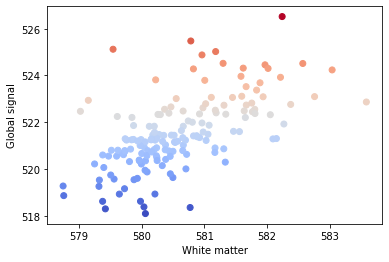

In [3]:
# Select columns representing global signal and white matter signal

conf_wm = conf['white_matter'].values
conf_gs = conf["global_signal"].values

# Plot association between these signals using on scatterplot

plt.scatter(conf_wm, conf_gs, c=conf_gs, cmap="coolwarm")
plt.xlabel ("White matter")
plt.ylabel("Global signal")



In [4]:
# Run simple linear regression for global signal and white matter signal

lr = LinearRegression()
lr.fit(conf_wm.reshape(-1, 1), conf_gs.reshape(-1, 1))

# Print intercept and beta values
beta = lr.coef_
intercept = lr.intercept_ 
print("Beta:", beta)
print("Intercept:", intercept)

Beta: [[1.06350464]]
Intercept: [-95.93981294]


Text(0, 0.5, 'Global signal')

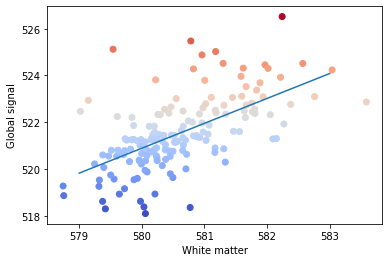

In [5]:
# Make a scatterplot representing association between signals with fitted linear regression line
x = np.linspace(579,583,100) 
y = beta*x+intercept 
y = np.squeeze(y)

plt.scatter(conf_wm, conf_gs, c=conf_gs, cmap="coolwarm")
plt.plot(x,y)
plt.xlabel ("White matter")
plt.ylabel("Global signal")


### Task 2

*Framewise displacement* variable in confounds table (stored as `framewise_displacement`) is a quantification of the estimated bulk-head motion. Run multiple linear regression to predict `framewise_displacement` from six motion parameters (3 rotations, 3 translations). Use previously loaded confounds table.


   framewise_displacement
0                     NaN
1                0.204795
2                0.084094
3                0.066659
4                0.116312
framewise_displacement    1
dtype: int64
   framewise_displacement
0                0.113777
1                0.204795
2                0.084094
3                0.066659
4                0.116312


C:\Users\Iga\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


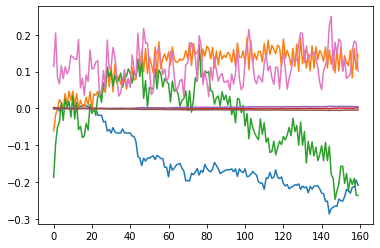

In [6]:
# Filter dataframe to store only 6 motion parameters

motion = conf[["trans_x", "trans_y", "trans_z", "rot_x", "rot_y", "rot_z"]]


# Filter dataframe to store framewise displacement

framewise_displacement = conf[["framewise_displacement"]]
print(framewise_displacement.head())

#Pzy próbie wywołania regresj liniowej pojawiał się błąd, że df zawiera wartości NaN - poniższy kod rozwiązuje problem:

#zliczanie ile jest wartości NaN 
print(framewise_displacement.isnull().sum()) 

#zamianna wartości NaN na średnią wartość kolumny
framewise_displacement.fillna(framewise_displacement.mean(), inplace=True)
print(framewise_displacement.head())

# dla lepszego wyobrażenia - wyplotowanie ruchu oraz estimated bulk-head motion na jednym wykresie
plt.plot(motion) 
plt.plot(framewise_displacement) 

In [7]:
# Fit multiple linear regression model 

mlr = LinearRegression()
mlr.fit(motion, framewise_displacement)

# Print intercept and beta values
print(mlr.coef_, mlr.intercept_)

[[-0.40258057 -0.1551424  -0.08531521 -3.54542807 -3.06695021  7.68563358]] [0.10209631]


Which of the 6 motion parameter values has highest corresponding beta value?

**Answer**: The highest corresponding beta value has "rot_z" (rotation along the axis z)

--------

## Linear regression on movie/TV series characters profile pictures

### Task 3

In folder `data/characters` you can find pictures of 5 characters from Harry Potter movie stored as 400$\times$400 numpy arrays (RED channel). 

Add your favourite movie/TV character from previous homework to the folder (array has to have the same dimension) and run multiple regression to predict your character from other other characters pictures. 

You can load more pictures to improve your prediction!!!


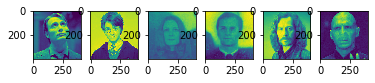

In [8]:
# Load image of your favoutite character

hannibal = np.load("data/characters/red_image.npy")

# Load pictures of other characters
harry = np.load("data/characters/harry.npy")
lilly = np.load("data/characters/lilly.npy")
james = np.load("data/characters/james.npy")
syrius = np.load("data/characters/syrius.npy")
voldemort = np.load("data/characters/voldemort.npy")


# Plot all pictures on a one figure (use plt.subplots)

ig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,6)

ax1.imshow(hannibal)
ax2.imshow(harry)
ax3.imshow(lilly)   
ax4.imshow(james)
ax5.imshow(syrius)
ax6.imshow(voldemort)
plt.show()

In [9]:
# Make a matrix of characters (remember to change matrices to vectors and transpose).
lista = [hannibal, harry, lilly, james, syrius, voldemort]
characters = []
for i in lista:
    characters.append(i.flatten())

characters2 = np.vstack((characters))
print(characters2.shape)
characters_trans = characters2.T
print(characters_trans.shape)

# Fit multiple linear regression to predict your favourite character from other characters
mlr2 = LinearRegression()
mlr2.fit(characters_trans[:,1:], characters_trans[:,0])

# Print intercept and beta values
betas = mlr2.coef_
intercept = mlr2.intercept_
print(betas, intercept)


(6, 160000)
(160000, 6)
[-0.08084549 -0.34364521 -0.01864605  0.11905968  0.51197458] 105.04283822018094


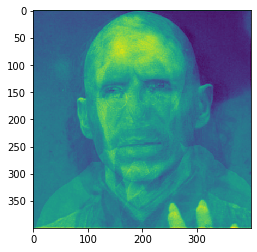

In [10]:
# Calculate your predicted character

predicted_hannibal = betas[0]*harry + betas[1]*lilly + betas[2]*james + betas[3]*syrius + betas[4]*voldemort + intercept

# Plot your original character and predicted character on a one plot (use plt.subplots)
plt.imshow(predicted_hannibal)


Which of the characters has highest and lowest corresponding beta values?

**Highest**: Voldemort

**Lowest**: Lilly